# Pedestrian Detection using Mask R-CNN
### Pre-processing Images from INRIA Person Dataset

In [36]:
import numpy as np
import scipy as sp
import matplotlib.image as mpimg 
import os
from imageio import imread
import matplotlib.pyplot as plt

Loading images from the dataset `../Datasets/`

In [2]:
data_root = "../Datasets"
annotation_path = os.path.join(data_root, 'GRAZ02/Annotations')
train_img_path = os.path.join(data_root, 'GRAZ02/Training_Data')

classes = ['bike', 'carsgraz', 'person']

In [19]:
def rgb2ycbcr(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return np.uint8(ycbcr)

In [55]:
class RawTrainingData():
    '''Class to load raw training data'''
    
    def __init__(self, train_img_path=train_img_path, annotation_path=annotation_path, classes=classes):
        self.train_img_path = train_img_path
        self.annotation_path = annotation_path
        self.classes = classes
        self.img_files = sorted(os.listdir(self.train_img_path))
        self.ann_files = sorted(os.listdir(self.annotation_path))
        self.N = len(self.img_files)
        sample_image = imread(os.path.join(self.train_img_path, self.img_files[0]))
        self.H, self.W, self.C = sample_image.shape
        self.X = np.zeros((self.N, self.H, self.W))
        self.X_mask = np.zeros((self.N, self.H, self.W))
        self.y = np.zeros((self.N, 1))
    
    def load_data(self):
        '''Loading Image Data into numpy arrays'''
        for i in range(self.N):
            if i % 50 == 0:
                print("Loaded %d images out of %d..." %(i+50, self.N))
            img_path = os.path.join(self.train_img_path, self.img_files[i])
            ann_path = os.path.join(self.annotation_path, self.ann_files[i])
            img = imread(img_path)
            img = rgb2ycbcr(img)
            img = img[:, :, 0]
            if img.shape[0] == 640 and img.shape[1] == 480:
                self.X[i] = img.T
            else:
                self.X[i] = img
            
            ann = imread(ann_path)
            if ann.shape[0] == 640 and ann.shape[1] == 480:
                self.X_mask[i] = ann.T
            else:
                self.X_mask[i] = ann
            self.y[i] = int(i/300)

In [56]:
rw_tr_data = RawTrainingData(train_img_path, annotation_path, classes)
rw_tr_data.load_data()

Loaded 50 images out of 900...
Loaded 100 images out of 900...
Loaded 150 images out of 900...
Loaded 200 images out of 900...
Loaded 250 images out of 900...
Loaded 300 images out of 900...
Loaded 350 images out of 900...
Loaded 400 images out of 900...
Loaded 450 images out of 900...
Loaded 500 images out of 900...
Loaded 550 images out of 900...
Loaded 600 images out of 900...
Loaded 650 images out of 900...
Loaded 700 images out of 900...
Loaded 750 images out of 900...
Loaded 800 images out of 900...
Loaded 850 images out of 900...
Loaded 900 images out of 900...


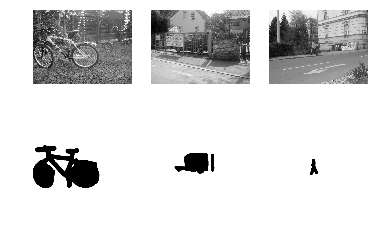

In [64]:
# Visualize Loaded Data
for i in range(3):
    plt.subplot(2, 3, i + 1)
    img = rw_tr_data.X[300*i + 1]
    plt.imshow(img.astype('uint8'), 'gray')
    plt.axis('off')

    plt.subplot(2, 3, 3+(i+1))
    img = rw_tr_data.X_mask[300*i + 1]
    plt.imshow(img.astype('uint8'), 'gray')
    plt.axis('off')
    
    plt.subplot(2, 3, 3+(i+1))
    img = rw_tr_data.X_mask[300*i + 1]
    plt.imshow(img.astype('uint8'), 'gray')
    plt.axis('off')
    

In [ ]:
# Generating Data from Raw Data

def horizontal_shift(raw_data):
    pass

def gaussian_blurr(raw_data):
    pass

def change_bg(raw_data):
    pass

def occlusion(raw_data):
    pass